# TASK 2

In [1]:
## Imporing all the necessary libraries

import pandas as pd
import warnings
import spacy
import en_core_web_sm
warnings.filterwarnings('ignore')

## Reading the company 'descriptions.xlsx' and 'Industry Segments - Top 10 Keywords.xlsx' using pandas library
company_data = pd.read_excel('Technical Analyst/company descriptions.xlsx')
industries = pd.read_excel('Technical Analyst/Industry Segments - Top 10 Keywords.xlsx')

In [2]:
## Let's visualize the 'descriptions.xlsx' data 
company_data

,company_name,company_short_description,company_description
0,Codementor,Codementor is an online marketplace connecting...,Codementor provides live 1:1 help for software...
1,AgShift,AgShift is designing world's most advanced aut...,AgShift solution blends Deep Learning with Com...
2,Shipsi,Shipsi empowers any retailer with the ability ...,Shipsi empowers any retailer with the ability ...
3,OpenNews,"OpenNews helps a global network of developers,...","We're helping a global network of developers, ..."
4,Biobot Analytics,Biobot Analytics analyzes city sewage to estim...,Biobot Analytics analyzes sewage to estimate o...
...,...,...,...
19960,Powermat Technologies,Powermat Technologies develops wireless energy...,Powermat Technologies is a developer of wirele...
19961,Properly,The Ultimate Turnover Tool for Vacation Rental...,Properly is a visual checklist tool that lets ...
19962,Bid Ops,Bid Ops accelerates business partnerships betw...,NaN
19963,Tavolo,Tavolo is an online retailer and destination f...,Tavolo offers an online store that enables its...


In [3]:
## Let's visualize the data 'Industry Segments - Top 10 Keywords.xlsx'
industries

,Industry segment,Tags
0,Aerospace and defense,"Security, systems, video, surveillance, servic..."
1,Agriculture and forestry,"Service, cleantech, water, agriculture, traits..."
2,Biopharmaceuticals,"Developer, treatment, drug, diseases, technolo..."
3,Business support services,"Service, platform, online, management, data, m..."
4,Communications and networking,"Service, wireless, network, data, internet, ap..."
5,Construction and civil engineering,"Service, cleantech, water, energy, waste, trea..."
6,Consumer information services,"Online, users, web, service, platform, social,..."
7,Electronics and computer hardware,"Technology, storage, energy, systems, applicat..."
8,Financial institutions and services,"Service, financial, payment, online, platform,..."
9,Food and beverage,"Food, organic, tea, beverages, ingredients, na..."


In [4]:
## Loading 'en_core_web_sm' for finding similaritites between two sentences by applying .similarity() method
nlp = en_core_web_sm.load()

#### Let's see one of the company industry segment by applying spacy sentense similarity technique. As see can see in the `Industry Segments - Top 10 Keywords.xlsx` dataset after 26th column `NaN` values are there, so inorder to avoid those I had used python list slicing concept

In [19]:

## Below code calculates sentense similarities by applying one of the company descriptions to all Industry segments, 
## and it stored to a list, in this case which gives maximum similarity will be the corresponding industry segment 

similar = []
m = 998
for (i,j) in zip(industries['Industry segment'][:27], industries['Tags'][:27]):
    token1 = nlp(company_data['company_description'][m])
    token2 = nlp( j )
    
    ## Here 'token1.similarity(token2)' returns similarity index value of token1 and token2
    ## appending similarity index value each time to the 'similar' list 
    
    ## Finding similaritites between two sentences by applying .similarity() method
    similar.append(token1.similarity(token2))
    

## Let's see here the Company Description and it's classification based on description
print(" Company Description : \n",nlp(company_data['company_description'][m]),"\n\n")

## Here similar.index(max(similar)) returns maximum similarity index value in the similar list 
## then by applying the resultant index to industries['Industry segment'] we will get company industry segment
print("Classification based on description =====>",industries['Industry segment'][similar.index(max(similar))])

 Company Description : 
 RecommendMe is in private beta on iOS right now.

RecommendMe is in private beta on iOS right now. Use the code BETA1 to sign up today! Android users submit your email below and we'll let you know when it's available. 


Classification based on description =====> Financial institutions and services


In [11]:

## And also check with some random company

similar = []
m = 43
for (i,j) in zip(industries['Industry segment'][:27], industries['Tags'][:27]):
    token1 = nlp(company_data['company_description'][m])
    token2 = nlp( j )
    
    ## Finding similaritites between two sentences by applying .similarity() method
    similar.append(token1.similarity(token2))
    
print(" Company Description : \n",nlp(company_data['company_description'][m]),"\n\n")
print("Classification based on description =====>",industries['Industry segment'][similar.index(max(similar))])

 Company Description : 
 ChipX, Inc. is a Mixed-Signal ASIC company with the broadest offering of value-added ASIC solutions, including Standard Cell, Structured ASIC and Hybrid ASIC technology.  ChipX has unique expertise in PCI Express, USB 2.0, DDR/DDR2 and data conversion mixed-signal cores; all are silicon proven and certified and they can be integrated in customersâ€™ ASICs with a record first-time to market success.  ChipX products are widely used in industrial applications, medical equipment and military/aerospace systems. Headquartered in Santa Clara, CA, ChipX is a privately held corporation, with a Research and Development subsidiary in Israel. 


Classification based on description =====> Semiconductors


#### The `company_data['company_description']` contains some `NaN` data, inorder to resolve that, I've used `company_data['company_short_description']`. In `company_data['company_short_description']` data there are no `NaN` values

In [20]:

## Storing all the resultant company industry segments to list 'Classification'
classification = []

## Looping over company_data['company_description'] , company_data['company_short_description'] each time
for ( description, short_description ) in zip(company_data['company_description'] , 
                                              company_data['company_short_description']):
    
    ## similarity_score for single company by different Industry Tags 
    similarity_score = []
    
    ## As I mentioned earlier after 26th row there are NaN values in Industry Tags they are no more useful
    
    for tags in industries['Tags'][:27]:
        
        ## Checking if company_data['company_description'] is a NaN
        
        if type( description ) != float:
            
            ## For maintining description as same in each time I'm assigning description to desc
            desc = description
            description = nlp(description)
            tags = nlp(tags)
            
            ## Finding similaritites between two sentences by applying .similarity() method
            similarity_score.append(description.similarity(tags))
            description = desc
            
        else:
            ## For maintining short_description as same in each time I'm assigning short_description to desc
            desc = short_description
            short_description = nlp(short_description)
            tags = nlp(tags)
            
            ## Finding similaritites between two sentences by applying .similarity() method
            similarity_score.append(short_description.similarity(tags))
            short_description = desc
            
    ## appending classified industry segment of each description by applying 
    ## industries['Industry segment'][similarity_score.index(max(similarity_score))] in each company description        
    classification.append(industries['Industry segment'][similarity_score.index(max(similarity_score))])

In [24]:
## Creating DataFrame for storing the results
Company_Industry_Segment = pd.DataFrame(zip(list(company_data['company_name']), classification),
                                     columns  = ["Company_Name", "Industry_Segment"])

In [25]:
## Let's see the Company Industry Segment data
Company_Industry_Segment

,Company_Name,Industry_Segment
0,Codementor,Semiconductors
1,AgShift,Medical devices and equipment
2,Shipsi,Personal goods
3,OpenNews,Medical devices and equipment
4,Biobot Analytics,Medical devices and equipment
...,...,...
19960,Powermat Technologies,Semiconductors
19961,Properly,Medical devices and equipment
19962,Bid Ops,Food and beverage
19963,Tavolo,Semiconductors


In [26]:
## Storing it to a CSV file 
Company_Industry_Segment.to_csv('Company_Industry_Segment.csv')

In [157]:
## Count the number of occurances of each Industry Segment
Company_Industry_Segment.pivot_table( index = ['Industry_Segment'], aggfunc = 'size')

Industry_Segment
Aerospace and defense                            3
Agriculture and forestry                        51
Biopharmaceuticals                             284
Business support services                      111
Communications and networking                    7
Construction and civil engineering              10
Consumer information services                  290
Electronics and computer hardware                8
Financial institutions and services            441
Food and beverage                             1180
Healthcare services                             24
Household and office goods                       8
Machinery and industrial goods                 106
Media and content                                5
Medical devices and equipment                 4629
Medical software and information services        9
Non-renewable energy                          1082
Personal goods                                 357
Renewable energy                                16
Retailers     




Bar plot represents counting of companies based on industry segments


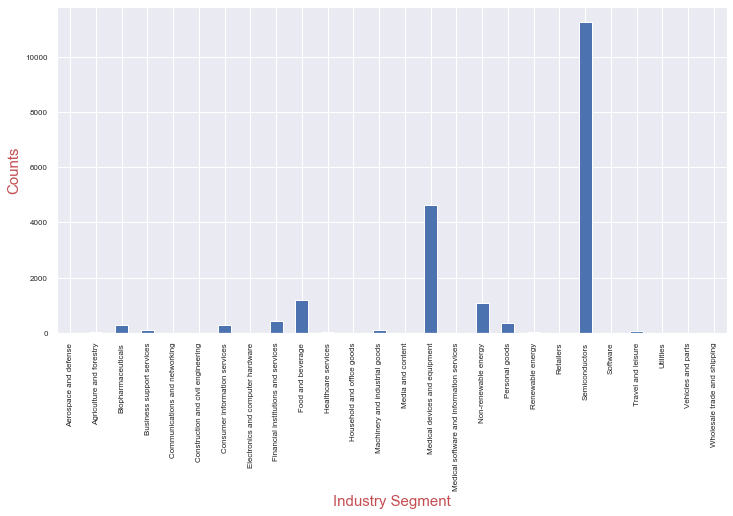

In [155]:
print("\n\n")
print("Bar plot represents counting of companies based on industry segments")

## freq_counts is the number of occurances of each Industry Segment
freq_counts = Company_Industry_Segment.pivot_table( index = ['Industry_Segment'], aggfunc = 'size')
plt.figure(figsize = (12, 6))
freq_counts.plot.bar()
plt.xlabel('Industry Segment', color = 'r', fontsize = 15)
plt.ylabel('Counts', color = 'r', fontsize = 15)
sns.set_style('darkgrid')




Pie plot represents percentage companies based on industry segments


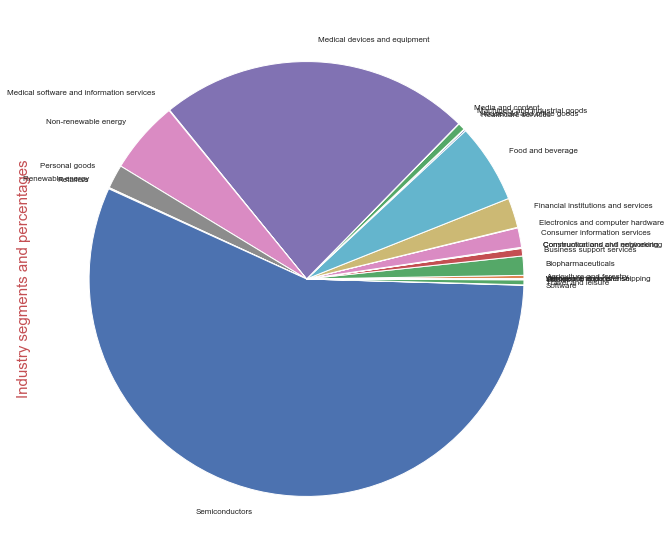

In [156]:
print("\n\n")
print("Pie plot represents percentage companies based on industry segments")
plt.figure(figsize = (20, 10))
freq_counts.plot.pie()
plt.ylabel('Industry segments and percentages', color = 'r', fontsize = 15)
sns.set_style('darkgrid')